<a href="https://colab.research.google.com/github/MahalakshmiDSML/Study-guide/blob/main/Feature_Engineering_Scaling_Selection_FNB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering Scaling Selection

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Feature Engineering

from sklearn.preprocessing import LabelEncoder #categorical data convert into numerical values
#we will also use pd.get_dummies()

#Feature Scaling
from sklearn.preprocessing import StandardScaler # standardize the data into single unit for easy understanding by the machine

#Feature Selection

from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
url = "https://raw.githubusercontent.com/narenmentor/Datasets/refs/heads/main/ML%20Datasets/titanic.csv"
df=pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Understand about the dataset

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Feature Understanding


- PassengerId -  A unique identifier assigned to each passenger. ( Not useful for predictions, often dropped)

- Survived - Indicates whether the passenger survived or not. Type: Categorical (0 = No, 1 = Yes) (This is the target variable in classification models)

- Pclass - The class of the passenger ticket, representing socio-economic status. (Important feature, as higher-class passengers had a higher survival rate.)

- Name - The full name of the passenger. Not directly used in models, but can be used to extract "Title" (Mr, Mrs, Miss, etc.)

- Sex - The gender of the passenger.  Important feature, as women had a higher survival rate than men.

- Age - The age of the passenger in years. Important feature, as children had higher survival rates. Missing values are often filled using median imputation.



- SibSp - Number of siblings/spouses aboard the Titanic with the passenger.

- Parch - Number of parents/children aboard the Titanic with the passenger.

SibSp + Parch
Used to derive "FamilySize". Passengers with small family groups had a higher survival rate.




- Ticket - The ticket number of the passenger. Not directly useful for prediction, but sometimes grouped to find common ticket holders (family/friends).

- Fare - The price of the passenger's ticket. Important feature, as higher fares often correlated with higher-class passengers and better survival rates.

- Embarked - The port where the passenger boarded the Titanic.
Categorical (C = Cherbourg, Q = Queenstown, S = Southampton)
Important feature, as passengers from Cherbourg (C) had a higher survival rate compared to other ports.

In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Dropping irrelavant feature

In [ ]:
newdf = df.drop(columns=['PassengerId','Cabin','Ticket'])
newdf.shape

(891, 9)

#Handling Missing values

In [ ]:
newdf.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
newdf['Embarked'].mode()[0]

'S'

In [ ]:
newdf['Embarked'] = newdf['Embarked'].fillna(newdf['Embarked'].mode()[0])

In [ ]:
nullcount = newdf.isna().sum()
nullcount[nullcount>0]

,0
Age,177


In [ ]:
newdf['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
newdf['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
newdf['Age'] = newdf['Age'].fillna(newdf['Age'].mean())

In [ ]:
nullcount = newdf.isna().sum()
nullcount[nullcount>0]

,0


# Checking Duplicates

In [ ]:
newdf.duplicated().sum()

np.int64(0)

# Feature Engineering

In [ ]:
newdf['FamilySize'] = newdf['Parch']+newdf['SibSp']
newdf.shape

(891, 10)

In [ ]:
newdf.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0


In [ ]:
newdf['FamilySize'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [ ]:
newdf['isAlone'] = newdf['FamilySize']==0

In [ ]:
newdf.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,True


In [ ]:
False + True

1

In [ ]:
newdf['isAlone'] = (newdf['FamilySize']==0).astype(int)
newdf.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1


In [ ]:
newdf.shape

(891, 11)

#using regular expression

In [ ]:
newdf['Title'] = newdf['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [ ]:
newdf.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,Mrs


In [ ]:
newdf.drop(columns='Name',inplace=True)

In [ ]:
newdf.shape

(891, 11)

In [ ]:
newdf.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,1,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,0,Mrs


In [ ]:
newdf['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
newdf['Title'] = newdf['Title'].replace(['Master', 'Don', 'Rev', 'Dr', 'Mme','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'],"Others")

In [ ]:
newdf['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Others', 'Ms'], dtype=object)

In [ ]:
newdf['Title'] = newdf['Title'].replace('Ms','Miss')

In [ ]:
newdf['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Others'], dtype=object)

In [ ]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,1,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,1,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,1,Mr


#Checking Outliers

In [ ]:
newdf['Fare'].nunique()

248

#Checking boxplot for outliers in Fare feature

<Axes: ylabel='Fare'>

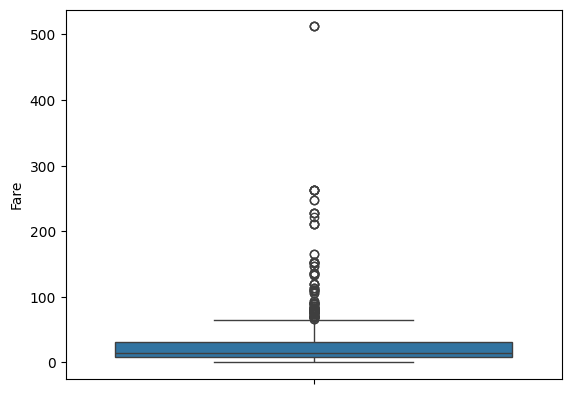

In [ ]:
sns.boxplot(data=newdf['Fare'])

In [ ]:
newdf.shape

(891, 11)

#Function to remove Outliers

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [ ]:
newdf2= remove_outliers(newdf, ['Fare'])
newdf2.shape

(775, 11)

In [ ]:
891 - 775

116

it seems 116 data points got removed which is huge number of data!

#Boxplot after outlier removal

<Axes: ylabel='Fare'>

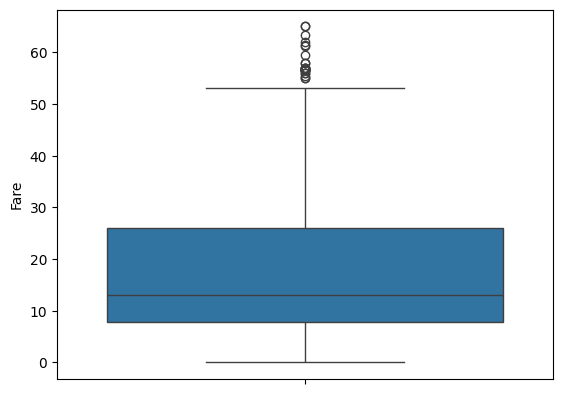

In [ ]:
sns.boxplot(data=newdf2['Fare'])

# Treating skewness

In [ ]:
newdf2['Fare'] = np.log1p(newdf2['Fare'])

/tmp/ipython-input-54-3866965132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2['Fare'] = np.log1p(newdf2['Fare'])


<Axes: ylabel='Fare'>

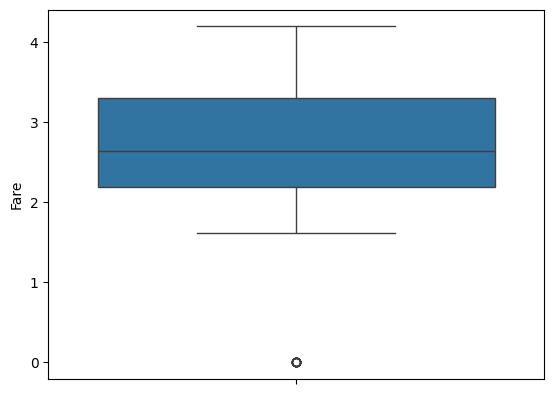

In [ ]:
sns.boxplot(data=newdf2['Fare'])

In [ ]:
newdf2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title
0,0,3,male,22.000000,1,0,2.110213,S,1,0,Mr
2,1,3,female,26.000000,0,0,2.188856,S,0,1,Miss
3,1,1,female,35.000000,1,0,3.990834,S,1,0,Mrs
4,0,3,male,35.000000,0,0,2.202765,S,0,1,Mr
5,0,3,male,29.699118,0,0,2.246893,Q,0,1,Mr


In [ ]:
newdf2.shape

(775, 11)

# Label Encoding

In [ ]:
newdf2['Sex'] = LabelEncoder().fit_transform(newdf2['Sex'])

/tmp/ipython-input-58-513010447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2['Sex'] = LabelEncoder().fit_transform(newdf2['Sex'])


In [ ]:
newdf2['Sex'].unique()

array([1, 0])

In [ ]:
newdf2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title
0,0,3,1,22.000000,1,0,2.110213,S,1,0,Mr
2,1,3,0,26.000000,0,0,2.188856,S,0,1,Miss
3,1,1,0,35.000000,1,0,3.990834,S,1,0,Mrs
4,0,3,1,35.000000,0,0,2.202765,S,0,1,Mr
5,0,3,1,29.699118,0,0,2.246893,Q,0,1,Mr


In [ ]:
newdf2['Embarked'] = LabelEncoder().fit_transform(newdf2['Embarked'])

/tmp/ipython-input-61-3007443229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2['Embarked'] = LabelEncoder().fit_transform(newdf2['Embarked'])


In [ ]:
newdf2['Embarked'].unique()

array([2, 1, 0])

In [ ]:
newdf2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title
0,0,3,1,22.000000,1,0,2.110213,2,1,0,Mr
2,1,3,0,26.000000,0,0,2.188856,2,0,1,Miss
3,1,1,0,35.000000,1,0,3.990834,2,1,0,Mrs
4,0,3,1,35.000000,0,0,2.202765,2,0,1,Mr
5,0,3,1,29.699118,0,0,2.246893,1,0,1,Mr


#using one hot encoding using get_dummies

In [ ]:
newdf4 =  newdf2.copy()

Mr Mrs Miss Others

1  0    0     0

0  0    1     0

0  0    0     1



In [ ]:
newdf4.shape

(775, 11)

In [ ]:
newdf4= pd.get_dummies(newdf4,columns=['Title'],drop_first=True)
newdf4.shape

(775, 13)

In [ ]:
newdf4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone,Title_Mr,Title_Mrs,Title_Others
0,0,3,1,22.000000,1,0,2.110213,2,1,0,True,False,False
2,1,3,0,26.000000,0,0,2.188856,2,0,1,False,False,False
3,1,1,0,35.000000,1,0,3.990834,2,1,0,False,True,False
4,0,3,1,35.000000,0,0,2.202765,2,0,1,True,False,False
5,0,3,1,29.699118,0,0,2.246893,1,0,1,True,False,False


In [ ]:
newdf4.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
newdf4.shape

(775, 11)

In [ ]:
newdf4.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Mr,Title_Mrs,Title_Others
0,0,3,1,22.000000,2.110213,2,1,0,True,False,False
2,1,3,0,26.000000,2.188856,2,0,1,False,False,False
3,1,1,0,35.000000,3.990834,2,1,0,False,True,False
4,0,3,1,35.000000,2.202765,2,0,1,True,False,False
5,0,3,1,29.699118,2.246893,1,0,1,True,False,False


In [ ]:
newdf4['FamilySize'].unique()

array([1, 0, 4, 2, 6, 5, 3, 7])

#Feature Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
newdf4 [['Age','Fare','Pclass','FamilySize']] = scaler.fit_transform(newdf4 [['Age','Fare','Pclass','FamilySize']] )

In [ ]:
newdf4.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Mr,Title_Mrs,Title_Others
0,0,0.708528,1,-0.556219,-0.824136,2,0.156739,0,True,False,False
2,1,0.708528,0,-0.243027,-0.713891,2,-0.549497,1,False,False,False
3,1,-2.016580,0,0.461654,1.812201,2,0.156739,0,False,True,False
4,0,0.708528,1,0.461654,-0.694393,2,-0.549497,1,True,False,False
5,0,0.708528,1,0.046606,-0.632533,1,-0.549497,1,True,False,False


In [ ]:
newdf4 [['Embarked']] = scaler.fit_transform(newdf4 [['Embarked']] )

In [ ]:
newdf4.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Mr,Title_Mrs,Title_Others
0,0,0.708528,1,-0.556219,-0.824136,0.539781,0.156739,0,True,False,False
2,1,0.708528,0,-0.243027,-0.713891,0.539781,-0.549497,1,False,False,False
3,1,-2.016580,0,0.461654,1.812201,0.539781,0.156739,0,False,True,False
4,0,0.708528,1,0.461654,-0.694393,0.539781,-0.549497,1,True,False,False
5,0,0.708528,1,0.046606,-0.632533,-0.822858,-0.549497,1,True,False,False


#Feature Selection

- SelectKbest
- Correlation matrix

## Quick Decision Guide

 If the target is categorical (classification problem):

Numerical features? → Use f_classif - use when we have negative values

Categorical features? → Use chi2 - work only for non negative values

Non-linear relationships? → Use mutual_info_classif

If the target is continuous (regression problem):
Numerical features? → Use f_regression

Non-linear relationships? → Use mutual_info_regression

X --> Input Feature - other than Survived

y --> Target Feature --> Survived

In [ ]:
newdf4.shape

(775, 11)

In [ ]:
X = newdf4.drop(columns=['Survived'])
X.shape

(775, 10)

In [ ]:
y = newdf4['Survived']
y.shape

(775,)

## using SelectKbest

In [ ]:
selector = SelectKBest(score_func=f_classif,k=8)
X_selected = selector.fit_transform(X,y)

In [ ]:
selected_Features = X.columns[selector.get_support()]
selected_Features

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'isAlone', 'Title_Mr',
       'Title_Mrs'],
      dtype='object')

## using corrleation matrix

In [ ]:
corr_matrix = X[selected_Features].corr()
corr_matrix

,Pclass,Sex,Age,Fare,Embarked,isAlone,Title_Mr,Title_Mrs
Pclass,1.000000,0.011810,-0.342826,-0.489322,0.022424,0.020481,0.038188,-0.098612
Sex,0.011810,1.000000,0.130207,-0.187440,0.069446,0.333910,0.859970,-0.557986
Age,-0.342826,0.130207,1.000000,0.040089,0.021965,0.264587,0.242207,0.143289
Fare,-0.489322,-0.187440,0.040089,1.000000,-0.057515,-0.496533,-0.270051,0.228343
Embarked,0.022424,0.069446,0.021965,-0.057515,1.000000,0.037771,0.080828,0.018196
isAlone,0.020481,0.333910,0.264587,-0.496533,0.037771,1.000000,0.432426,-0.367300
Title_Mr,0.038188,0.859970,0.242207,-0.270051,0.080828,0.432426,1.000000,-0.479851
Title_Mrs,-0.098612,-0.557986,0.143289,0.228343,0.018196,-0.367300,-0.479851,1.000000


<Axes: >

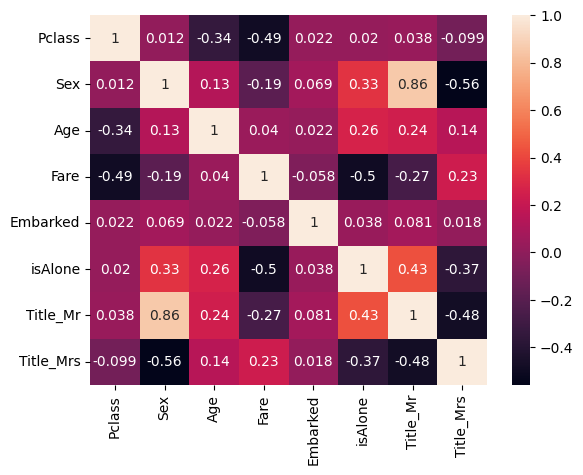

In [ ]:
sns.heatmap(corr_matrix,annot=True)

In [ ]:
threshold = 0.85
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_features.add(corr_matrix.columns[i])

In [ ]:
high_corr_features

{'Title_Mr'}

In [ ]:
X.shape

(775, 10)

In [ ]:
X_final = X[selected_Features].drop(columns=high_corr_features)
X_final.shape

(775, 7)

In [ ]:
type(X_final)

pandas.core.frame.DataFrame

In [ ]:
X_final.head()

,Pclass,Sex,Age,Fare,Embarked,isAlone,Title_Mrs
0,0.708528,1,-0.556219,-0.824136,0.539781,0,False
2,0.708528,0,-0.243027,-0.713891,0.539781,1,False
3,-2.016580,0,0.461654,1.812201,0.539781,0,True
4,0.708528,1,0.461654,-0.694393,0.539781,1,False
5,0.708528,1,0.046606,-0.632533,-0.822858,1,False


In [ ]:
y.head()

,Survived
0,0
2,1
3,1
4,0
5,0


-- will give this as input to machine learning and we wil build the machine learning model